In [2]:
import financedatabase as fd

import pandas as pd
import yfinance as yf
import numpy as np
import datetime as dt

import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("default")
print(plt.style.available)
from matplotlib.ticker import FuncFormatter

import plotly.offline as pyo
pd.options.plotting.backend = 'plotly' 
import plotly.express as px
import plotly.graph_objects as gp
from plotly.subplots import make_subplots
import plotly.graph_objects as go  # graphing objects

In [3]:
equities = fd.Equities()

In [4]:
# List all available sectors
sectors = equities.options('sector')

# List all available industries
industries = equities.options('industry')

# List all available countries
countries = equities.options('country')

# List all available industry group
industry_group = equities.options("industry_group")

#Select the exchanges
exchange_list = ["NAS","NMS"]

us_bioinformatics_companies = equities.search(industry_group='Pharmaceuticals, Biotechnology & Life Sciences'
                                              ,industry="Biotechnology"
                                              ,country = "United States"
                                              ,market_cap = ["Mega Cap","Large Cap"]
                                              ,exchange = exchange_list)

In [9]:
#Create the tickers
tickers = list(us_bioinformatics_companies.index)
tickers

['ALNY',
 'ALXN',
 'BMRN',
 'DXCM',
 'EXAS',
 'EXEL',
 'IDXX',
 'ILMN',
 'INCY',
 'INSM',
 'KRTX',
 'MEDP',
 'MRNA',
 'NBIX',
 'NTRA',
 'PCVX',
 'PRAH',
 'REGN',
 'RPRX',
 'SGEN',
 'SMMT',
 'SRPT',
 'TECH',
 'UTHR',
 'VRTX']

In [12]:
#Get the close price of the selected stocks
start = dt.datetime(2020,1,3)
end = dt.datetime(2024,11,30)

s_prices = yf.download(tickers,start,end)['Adj Close']
s_prices = s_prices.dropna()

s_prices.index = s_prices.index.strftime("%Y-%m-%d")
s_prices = s_prices.dropna(axis=1)
s_prices

[*********************100%***********************]  25 of 25 completed

4 Failed downloads:
['ALXN', 'PRAH', 'SGEN', 'KRTX']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Ticker                           ALNY  ALXN       BMRN       DXCM        EXAS  \
Date                                                                            
2020-01-03 00:00:00+00:00  115.680000   NaN  84.000000  54.674999   94.940002   
2020-01-06 00:00:00+00:00  115.970001   NaN  84.589996  56.497501   99.589996   
2020-01-07 00:00:00+00:00  115.290001   NaN  84.209999  57.862499  100.220001   
2020-01-08 00:00:00+00:00  115.470001   NaN  84.709999  58.307499  101.250000   
2020-01-09 00:00:00+00:00  118.059998   NaN  89.580002  59.817501  103.550003   
...                               ...   ...        ...        ...         ...   
2024-11-22 00:00:00+00:00  244.889999   NaN  64.260002  72.830002   52.910000   
2024-11-25 00:00:00+00:00  250.979996   NaN  65.089996  77.830002   55.139999   
2024-11-26 00:00:00+00:00  253.350006   NaN  64.879997  77.940002   60.099998   
2024-11-27 00:00:00+00:00  253.740005   NaN  65.419998  78.099998   61.689999   
2024-11-29 00:00:00+00:00  253.070007   NaN  66.029999  77.989998   62.080002   

Ticker                          EXEL        IDXX        ILMN       INCY  \
Date                                                                      
2020-01-03 00:00:00+00:00  17.010000  264.769989  313.939697  77.900002   
2020-01-06 00:00:00+00:00  17.559999  266.929993  316.663422  77.339996   
2020-01-07 00:00:00+00:00  18.680000  266.119995  320.710114  77.139999   
2020-01-08 00:00:00+00:00  18.950001  271.679993  323.112854  76.529999   
2020-01-09 00:00:00+00:00  18.629999  277.940002  325.486389  77.949997   
...                              ...         ...         ...        ...   
2024-11-22 00:00:00+00:00  35.610001  417.239990  140.139999  71.720001   
2024-11-25 00:00:00+00:00  36.380001  428.589996  143.820007  73.519997   
2024-11-26 00:00:00+00:00  36.450001  417.320007  142.949997  74.800003   
2024-11-27 00:00:00+00:00  35.930000  421.760010  144.360001  75.449997   
2024-11-29 00:00:00+00:00  36.459999  421.750000  144.149994  74.589996   

Ticker                          INSM  ...       PCVX  PRAH        REGN  \
Date                                  ...                                
2020-01-03 00:00:00+00:00  23.750000  ...        NaN   NaN  369.160004   
2020-01-06 00:00:00+00:00  23.910000  ...        NaN   NaN  371.739990   
2020-01-07 00:00:00+00:00  24.719999  ...        NaN   NaN  373.130005   
2020-01-08 00:00:00+00:00  26.230000  ...        NaN   NaN  382.420013   
2020-01-09 00:00:00+00:00  25.809999  ...        NaN   NaN  383.470001   
...                              ...  ...        ...   ...         ...   
2024-11-22 00:00:00+00:00  73.150002  ...  88.540001   NaN  738.000000   
2024-11-25 00:00:00+00:00  74.089996  ...  91.699997   NaN  749.510010   
2024-11-26 00:00:00+00:00  75.680000  ...  91.449997   NaN  753.030029   
2024-11-27 00:00:00+00:00  75.879997  ...  93.980003   NaN  754.869995   
2024-11-29 00:00:00+00:00  75.160004  ...  94.339996   NaN  750.219971   

Ticker                          RPRX  SGEN       SMMT        SRPT       TECH  \
Date                                                                           
2020-01-03 00:00:00+00:00        NaN   NaN   1.498000  129.779999  53.084866   
2020-01-06 00:00:00+00:00        NaN   NaN   1.472000  131.449997  53.202457   
2020-01-07 00:00:00+00:00        NaN   NaN   1.500000  130.220001  52.913364   
2020-01-08 00:00:00+00:00        NaN   NaN   1.487000  130.029999  52.697773   
2020-01-09 00:00:00+00:00        NaN   NaN   1.450000  131.639999  53.087315   
...                              ...   ...        ...         ...        ...   
2024-11-22 00:00:00+00:00  26.430000   NaN  19.000000  114.230003  71.279999   
2024-11-25 00:00:00+00:00  26.469999   NaN  19.190001  114.650002  74.389999   
2024-11-26 00:00:00+00:00  26.290001   NaN  19.200001  130.500000  74.870003   
2024-11-27 00:00:00+00:00  26.600000   NaN  18.940001  137.940002  75.379997   
2024-11-29 00:00:00+00:00  26.660000   NaN  18.

In [15]:
weights = np.repeat(100,19)
prices = np.array(s_prices.iloc[0,])
values = weights * prices

weights = list(weights)
values = list(values)
prices = list(prices)


In [16]:
stocks = list(s_prices.columns)
stocks

['ALNY',
 'BMRN',
 'DXCM',
 'EXAS',
 'EXEL',
 'IDXX',
 'ILMN',
 'INCY',
 'INSM',
 'MEDP',
 'MRNA',
 'NBIX',
 'NTRA',
 'REGN',
 'SMMT',
 'SRPT',
 'TECH',
 'UTHR',
 'VRTX']

In [17]:
# Building the DataFrame of the biotech portfolio

df = pd.DataFrame(stocks)
df = df.set_index(0)
df = df.rename_axis("Company")
df['# of Shares'] =  weights
df['Starting Price'] = prices
df['Starting Price'] = df['Starting Price'].map('${: ,.2f}'.format)
df['Start Values'] = values
df['Start Values'] = df['Start Values'].map('${: ,.2f}'.format)


# of Shares Starting Price Start Values
Company                                         
ALNY             100       $ 115.68  $ 11,568.00
BMRN             100        $ 84.00   $ 8,400.00
DXCM             100        $ 54.67   $ 5,467.50
EXAS             100        $ 94.94   $ 9,494.00
EXEL             100        $ 17.01   $ 1,701.00
IDXX             100       $ 264.77  $ 26,477.00
ILMN             100       $ 313.94  $ 31,393.97
INCY             100        $ 77.90   $ 7,790.00
INSM             100        $ 23.75   $ 2,375.00
MEDP             100        $ 82.53   $ 8,253.00
MRNA             100        $ 18.89   $ 1,889.00
NBIX             100       $ 109.78  $ 10,978.00
NTRA             100        $ 32.86   $ 3,286.00
REGN             100       $ 369.16  $ 36,916.00
SMMT             100         $ 1.50     $ 149.80
SRPT             100       $ 129.78  $ 12,978.00
TECH             100        $ 53.08   $ 5,308.49
UTHR             100        $ 86.46   $ 8,646.00
VRTX             100       $ 217.98  $ 21,798.00

In [ ]:
#Get the ending price of the stocks
last_price = np.array(s_prices.iloc[-1,])
last_value = last_price * np.array(weights)
last_value = list(last_value)
last_price = list(last_price)

df['Ending Prices'] = last_price
df['Ending Prices'] = df['Ending Prices'].map('${: ,.2f}'.format)

df['Ending Values'] = last_value
df['Ending Values'] = df['Ending Values'].map('${: ,.2f}'.format)

In [ ]:
#Get the daily returns
d_return = s_prices.pct_change().dropna()

#Get the cumulative returns
cumul_return = ((1+d_return).cumprod()-1)*100
cumul_end_return  = cumul_return.iloc[-1:]

#Get the estimated volatility
d_vol = d_return.std() * 100
a_vol = d_vol * np.sqrt(252)

#Get the correlation matrix
corr = d_return.corr()

last_return = np.array(cumul_end_return.iloc[0].values)
last_return = list(last_return)

df['End Cumul. Returns'] = last_return
df['End Cumul. Returns'] = df['End Cumul. Returns'].map('{: ,.2f}%'.format) 

df['Daily Volatility'] = d_vol
df["Daily Volatility"] = df['Daily Volatility'].map('{: ,.2f}%'.format)
df["Annualized Volatility"] = a_vol
df["Annualized Volatility"] = df['Annualized Volatility'].map('{: ,.2f}%'.format)

df

In [18]:
#Plot the close price of the each stocks
plot = s_prices.plot()
plot.add_trace(go.Scatter(x = s_prices.index, y = s_prices))
plot.update_layout(
    title = "Portfolio Adjusted Closing Prices",
    yaxis = dict(title = 'USD Price per Share',
                titlefont_size = 12,
                tickfont_size = 12),
    autosize = False,
    width = 750,
    height = 500,
    margin = dict(l = 50, r = 50, b = 100, t= 100, pad = 5),
    paper_bgcolor = 'LightBlue')

In [126]:
#Daily return distribution
d_return.hist(figsize = (12,6), bins = 100)

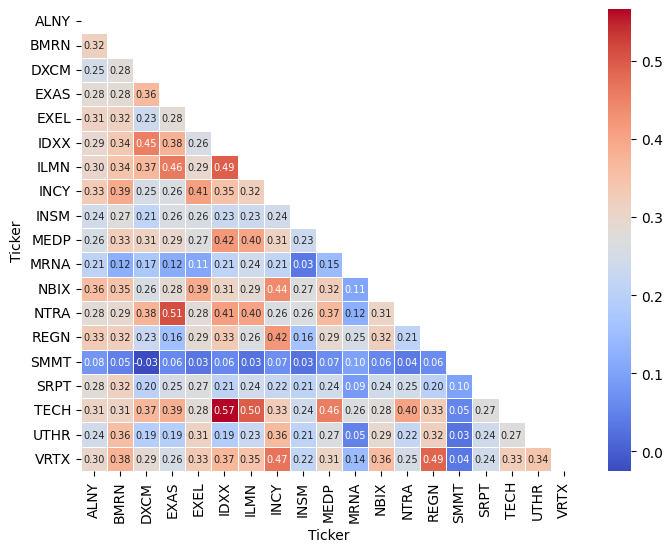

In [21]:
#Plot the correlation heat map 
plt.figure(figsize=(8,6))

mask = np.triu(np.ones_like(corr, dtype=bool))

sns.heatmap(
    corr,
    annot=True,
    cmap="coolwarm",
    fmt=".2f",
    linewidths=0.5,
    annot_kws={"size": 7},
    mask=mask
)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [23]:
d_return.index = pd.to_datetime(d_return.index)
d_return.index

DatetimeIndex(['2020-01-06', '2020-01-07', '2020-01-08', '2020-01-09',
               '2020-01-10', '2020-01-13', '2020-01-14', '2020-01-15',
               '2020-01-16', '2020-01-17',
               ...
               '2024-11-15', '2024-11-18', '2024-11-19', '2024-11-20',
               '2024-11-21', '2024-11-22', '2024-11-25', '2024-11-26',
               '2024-11-27', '2024-11-29'],
              dtype='datetime64[ns]', name='Date', length=1235, freq=None)

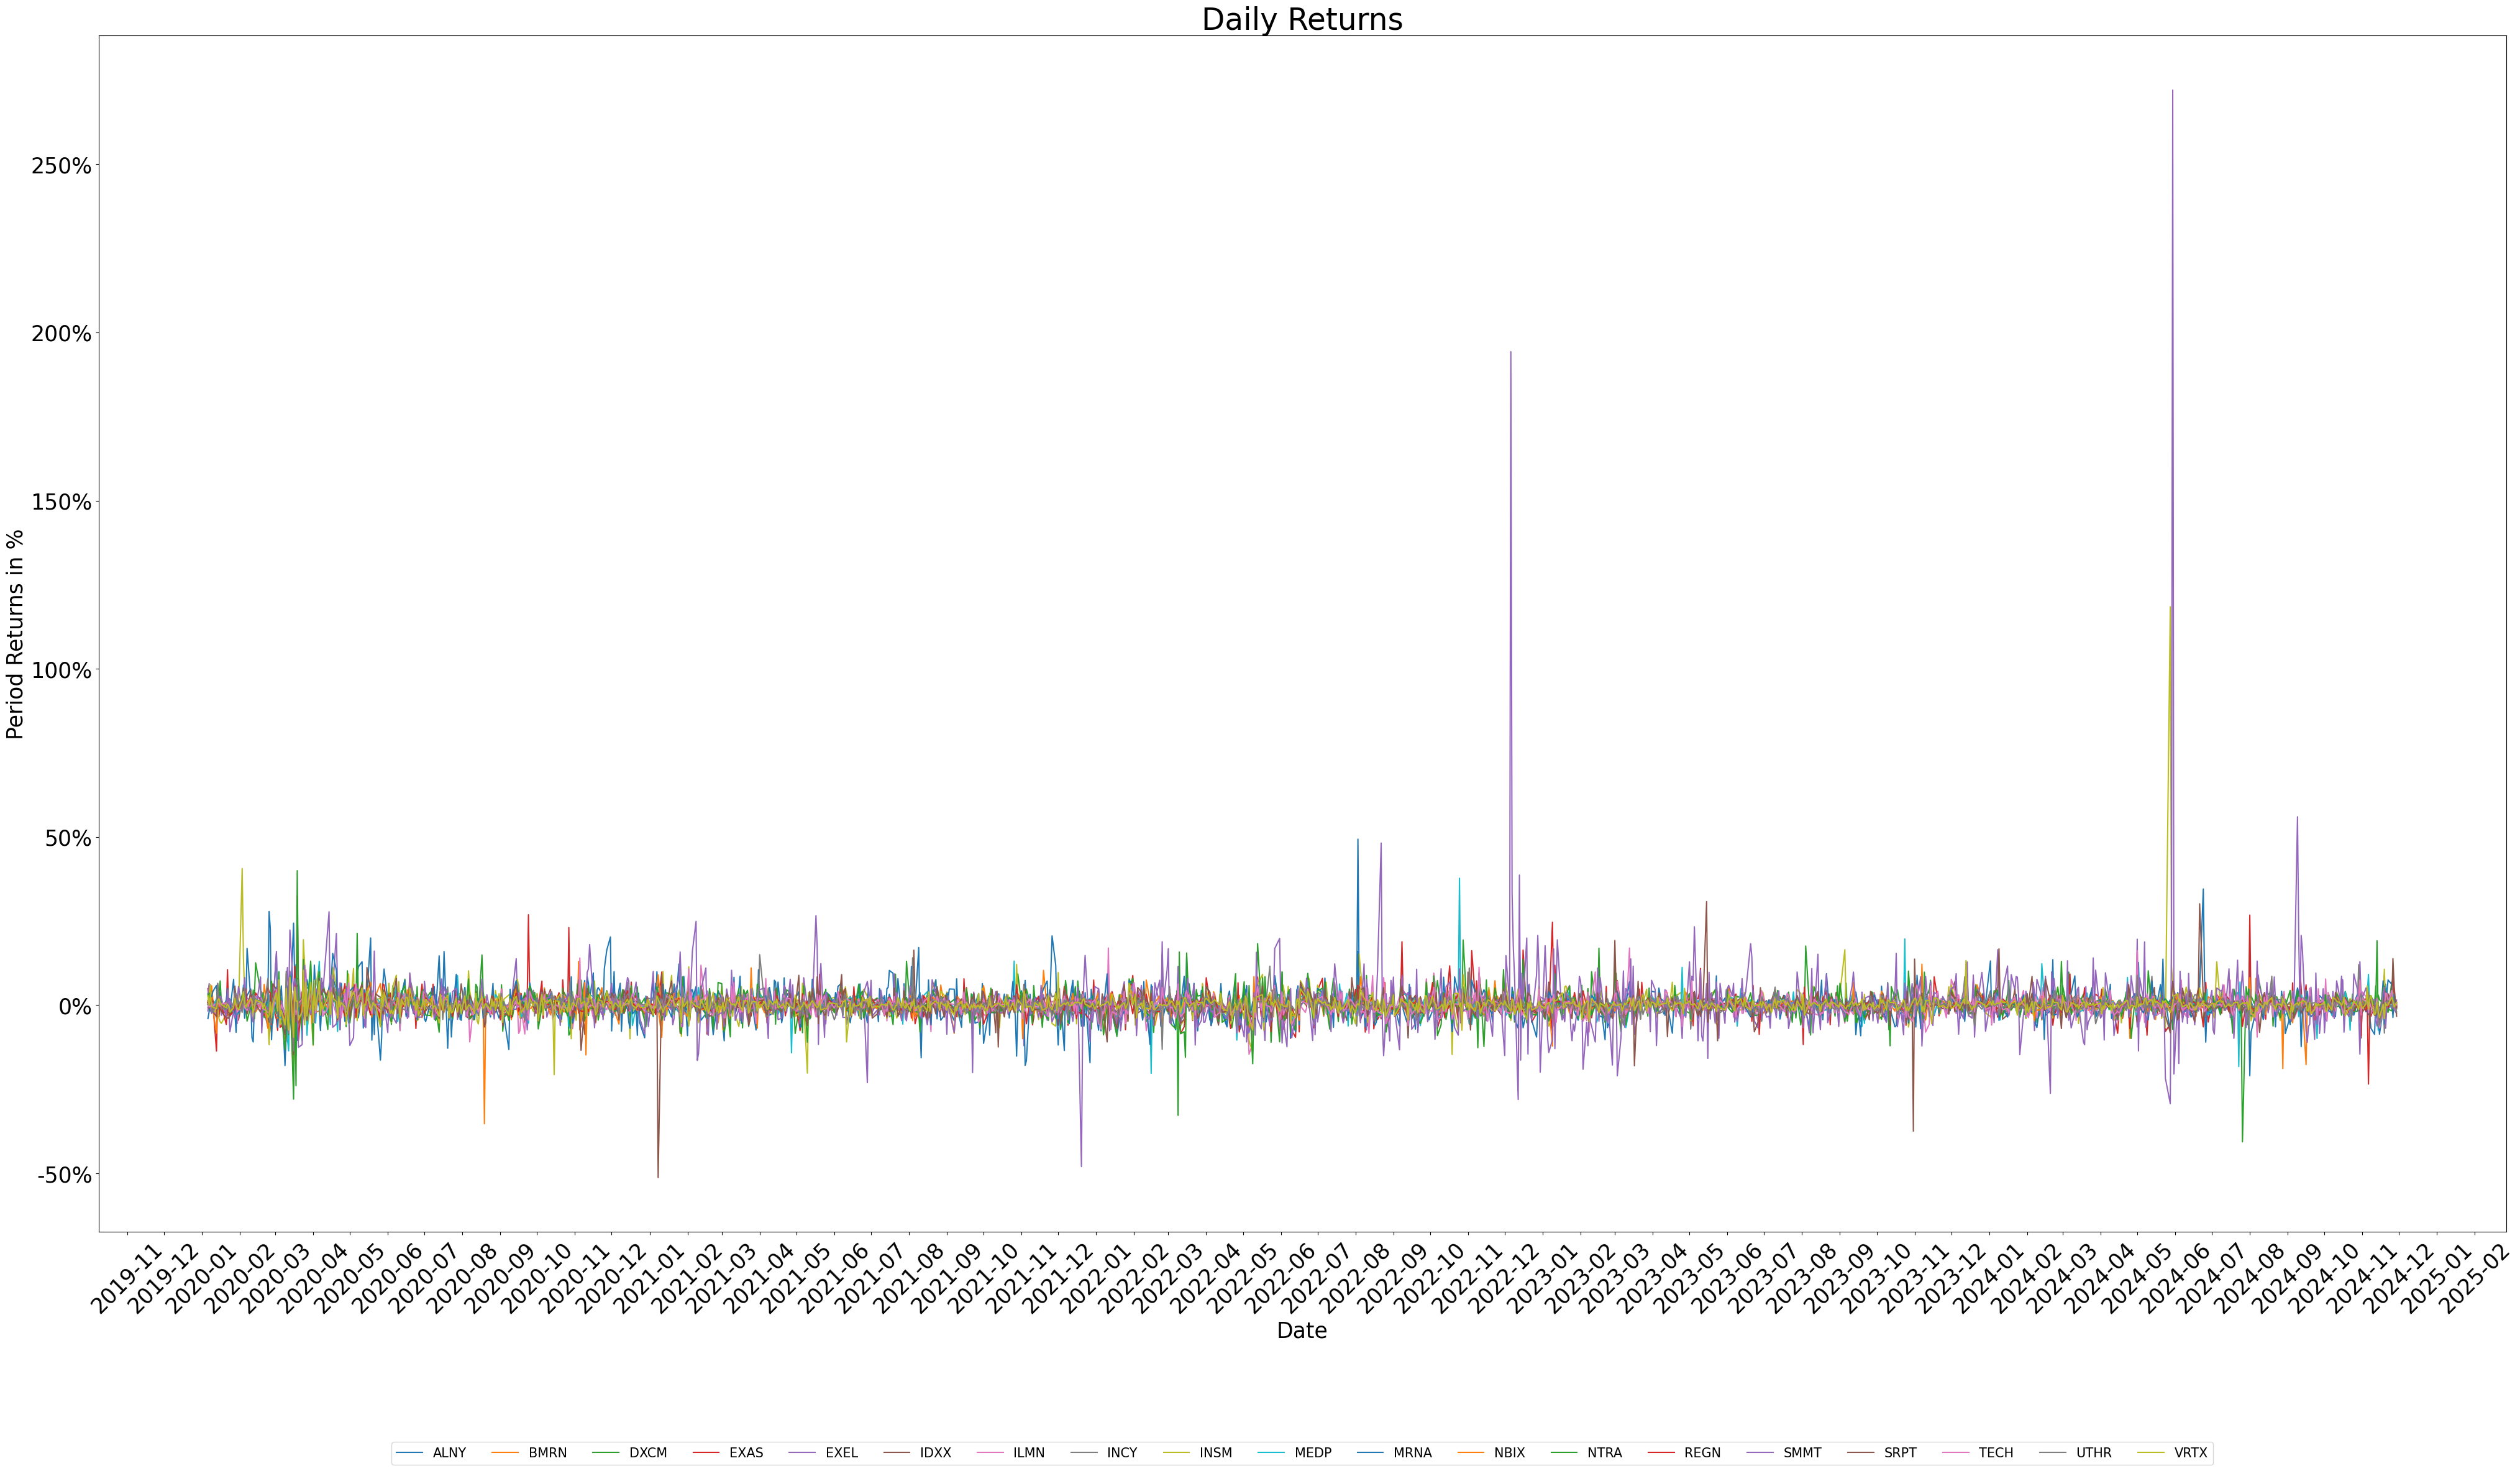

In [24]:
import matplotlib.dates as mdates

def percent_formatter(x, pos):
    return '{:.0%}'.format(x)

plt.figure(figsize=(50,25))
for x in d_return.columns.values:
    plt.plot(d_return.index, d_return[x], label = x)

plt.legend(d_return.columns.values, loc = 'lower center', bbox_to_anchor=(0.5,-0.2), 
           ncol = len(d_return.columns),fontsize = 15)    
plt.title("Daily Returns", fontsize = 35)
plt.xlabel("Date", fontsize = 25)
plt.xticks(fontsize = 25)
plt.ylabel("Period Returns in %", fontsize = 25)
plt.yticks(fontsize = 25)
plt.gca().yaxis.set_major_formatter(FuncFormatter(percent_formatter))

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))  
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())  
# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45)

plt.show()

In [26]:
# Volatility Graphics

annual_vol = pd.DataFrame(a_vol*0.01)
annual_vol.index.name = "Company"
annual_vol = annual_vol.rename(columns = {0 : 'Annualized Vol.'})

plot = px.scatter(annual_vol, title = "Annualized Volatility 2023 to Present",
                  labels = {'index': ' Date',
                           'value' : 'Annualized Volatility'})
def set_color(volatility):
    if volatility > 0.7:
        return 'red'
    elif volatility >= 0.4 and volatility <= 0.7:
        return 'blue'
    else:
        return 'green'

plot.update_traces(marker=dict(color = annual_vol['Annualized Vol.'].apply(set_color)))
                         
plot.update_layout(
    title = "Annualized Volatility 2023-Present",
    yaxis = dict(title = 'Annualized Volatility',
                titlefont_size = 15,
                tickfont_size = 15,
                tickformat = '.2%'),
    autosize = False,
    width = 750,
    height = 500,
    margin = dict(l = 50, r = 50, b = 100, t= 100, pad = 5),
    paper_bgcolor = 'LightBlue')


In [27]:
s_prices.describe(percentiles = [0.05,0.5,0.95])

Company         ALNY         BMRN         DXCM         EXAS         EXEL  \
count    1236.000000  1236.000000  1236.000000  1236.000000  1236.000000   
mean      174.682386    86.983422   103.243683    78.097451    21.098649   
std        41.471215    11.335124    22.313178    27.445197     3.386651   
min        93.120003    61.930000    47.790001    30.350000    14.460000   
5%        121.867498    72.545000    68.042498    39.929999    16.459999   
50%       166.875000    85.615002   104.536251    71.779999    21.139999   
95%       262.747513   110.850000   137.915619   131.357502    26.315000   
max       300.549988   131.029999   162.815002   155.009995    36.459999   

Company         IDXX         ILMN         INCY         INSM         MEDP  \
count    1236.000000  1236.000000  1236.000000  1236.000000  1236.000000   
mean      466.349433   257.555693    74.191189    30.539070   208.295182   
std       103.749007   110.091394    12.196012    15.057854    92.495798   
min       182.940002    90.262650    51.180000    13.630000    61.709999   
5%        279.000000   109.821632    55.392499    18.017500    87.680000   
50%       480.419998   223.740273    73.994999    26.125000   183.014999   
95%       655.209991   447.147369    97.315002    72.785002   397.754997   
max       705.760010   510.544739   109.690002    79.010002   457.290009   

Company         MRNA         NBIX         NTRA         REGN         SMMT  \
count    1236.000000  1236.000000  1236.000000  1236.000000  1236.000000   
mean      137.969280   107.608633    72.019745   700.470623     4.600824   
std        82.463013    16.968496    31.814033   180.302796     4.456849   
min        17.780001    72.449997    17.270000   336.179993     0.680000   
5%         31.790000    84.939999    35.085000   465.349991     1.040000   
50%       126.820000   103.540001    61.010000   660.674988     3.390000   
95%       333.160004   140.487495   122.512503  1050.902496    13.272500   
max       484.470001   153.149994   169.360001  1201.760010    31.930000   

Company         SRPT         TECH         UTHR         VRTX  
count    1236.000000  1236.000000  1236.000000  1236.000000  
mean      111.205461    81.701007   207.324482   301.728317  
std        27.403590    19.306021    66.565792    88.081905  
min        62.689999    39.546947    79.389999   177.009995  
5%         71.122498    52.395245   101.202501   191.059998  
50%       115.035000    77.760300   212.324997   284.839996  
95%       158.077499   120.721668   347.167503   476.204994  
max       178.740005   132.998230   410.000000   516.739990

In [28]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns


In [29]:
port_corr_matrix = d_return.corr()



In [41]:
mu = expected_returns.mean_historical_return(s_prices)
Sigma = risk_models.sample_cov(s_prices)

ef = EfficientFrontier(mu, Sigma)
weights = ef.max_sharpe()

weights

OrderedDict([('ALNY', 0.0),
             ('BMRN', 0.0),
             ('DXCM', 0.0),
             ('EXAS', 0.0),
             ('EXEL', 0.0),
             ('IDXX', 0.0),
             ('ILMN', 0.0),
             ('INCY', 0.0),
             ('INSM', 0.0),
             ('MEDP', 0.1630551300697756),
             ('MRNA', 0.0250355361528751),
             ('NBIX', 0.0),
             ('NTRA', 0.095894482334191),
             ('REGN', 0.0),
             ('SMMT', 0.0409291321881968),
             ('SRPT', 0.0),
             ('TECH', 0.0),
             ('UTHR', 0.6666912213864734),
             ('VRTX', 0.0083944978684881)])

In [42]:
clean_weights = ef.clean_weights()
clean_weights

OrderedDict([('ALNY', 0.0),
             ('BMRN', 0.0),
             ('DXCM', 0.0),
             ('EXAS', 0.0),
             ('EXEL', 0.0),
             ('IDXX', 0.0),
             ('ILMN', 0.0),
             ('INCY', 0.0),
             ('INSM', 0.0),
             ('MEDP', 0.16306),
             ('MRNA', 0.02504),
             ('NBIX', 0.0),
             ('NTRA', 0.09589),
             ('REGN', 0.0),
             ('SMMT', 0.04093),
             ('SRPT', 0.0),
             ('TECH', 0.0),
             ('UTHR', 0.66669),
             ('VRTX', 0.00839)])

In [43]:
ef.portfolio_performance(verbose=True)

Expected annual return: 35.6%
Annual volatility: 29.7%
Sharpe Ratio: 1.13


(0.3564249585498739, 0.29725073580509886, 1.1317884803167004)

In [44]:
d_return.head()

Company         ALNY      BMRN      DXCM      EXAS      EXEL      IDXX  \
Date                                                                     
2020-01-06  0.002507  0.007024  0.033333  0.048978  0.032334  0.008158   
2020-01-07 -0.005864 -0.004492  0.024160  0.006326  0.063781 -0.003034   
2020-01-08  0.001561  0.005938  0.007691  0.010277  0.014454  0.020893   
2020-01-09  0.022430  0.057490  0.025897  0.022716 -0.016887  0.023042   
2020-01-10  0.010080  0.016968 -0.008233  0.008595 -0.016640  0.013312   

Company         ILMN      INCY      INSM      MEDP      MRNA      NBIX  \
Date                                                                     
2020-01-06  0.008676 -0.007189  0.006737  0.008603 -0.040233  0.009018   
2020-01-07  0.012779 -0.002586  0.033877 -0.001321 -0.019305 -0.006410   
2020-01-08  0.007492 -0.007908  0.061084  0.006015  0.011249  0.011176   
2020-01-09  0.007346  0.018555 -0.016012  0.007414  0.023359  0.022194   
2020-01-10  0.002779 -0.018986 -0.016273 -0.004392  0.040217 -0.011252   

Company         NTRA      REGN      SMMT      SRPT      TECH      UTHR  \
Date                                                                     
2020-01-06  0.027693  0.006989 -0.017356  0.012868  0.002215  0.001272   
2020-01-07  0.035831  0.003739  0.019022 -0.009357 -0.005434  0.003928   
2020-01-08 -0.017439  0.024898 -0.008667 -0.001459 -0.004074  0.002877   
2020-01-09 -0.020803  0.002746 -0.024882  0.012382  0.007392  0.004704   
2020-01-10 -0.004606 -0.005372 -0.006897 -0.019903 -0.002538 -0.021697   

Company         VRTX  
Date                  
2020-01-06  0.027755  
2020-01-07 -0.001071  
2020-01-08  0.032620  
2020-01-09 -0.003592  
2020-01-10 -0.005689

In [46]:
expect_return = d_return.mean()*252
print(f"\nThe expected annual return of these stocks as a decimal is:\n{expect_return}.")


The expected annual return of these stocks as a decimal is:
Company
ALNY    0.276896
BMRN    0.027636
DXCM    0.200843
EXAS    0.104760
EXEL    0.236948
IDXX    0.155612
ILMN   -0.058115
INCY    0.039833
INSM    0.486163
MEDP    0.406581
MRNA    0.445377
NBIX    0.096741
NTRA    0.555940
REGN    0.191919
SMMT    1.555600
SRPT    0.190292
TECH    0.137894
UTHR    0.351207
VRTX    0.205990
dtype: float64.


In [49]:
# Creating Random Weighting of the Portfolio to start 
# Monte Carlo Simulation

np.random.seed(101)
print("Stocks in Portfolio")
print(stocks)
print('______________________________________________________________________________________')
weights = np.array(np.random.random(19))
print("Random Weights")
print(weights)
print('______________________________________________________________________________________')
print('Rebalanced Weights')
r_weights = weights/np.sum(weights)
print(r_weights)
print('______________________________________________________________________________________')
print("Portfolio Return")
port_ret_monte = np.sum(d_return.mean()*252*r_weights)
print(f'{port_ret_monte*100: ,.4f}%')
print('______________________________________________________________________________________')


Stocks in Portfolio
['ALNY', 'BMRN', 'DXCM', 'EXAS', 'EXEL', 'IDXX', 'ILMN', 'INCY', 'INSM', 'MEDP', 'MRNA', 'NBIX', 'NTRA', 'REGN', 'SMMT', 'SRPT', 'TECH', 'UTHR', 'VRTX']
______________________________________________________________________________________
Random Weights
[0.51639863 0.57066759 0.02847423 0.17152166 0.68527698 0.83389686
 0.30696622 0.89361308 0.72154386 0.18993895 0.55422759 0.35213195
 0.1818924  0.78560176 0.96548322 0.23235366 0.08356143 0.60354842
 0.72899276]
______________________________________________________________________________________
Rebalanced Weights
[0.05490045 0.06067    0.00302721 0.01823517 0.0728546  0.08865498
 0.03263483 0.09500366 0.07671028 0.02019319 0.0589222  0.03743659
 0.01933772 0.08352053 0.10264447 0.02470247 0.00888376 0.0641657
 0.0775022 ]
______________________________________________________________________________________
Portfolio Return
 35.8590%
______________________________________________________________________________

In [50]:
print("Expected Porfolio Volatility")
p_vol = np.sqrt(np.dot(r_weights.T, np.dot(d_return.cov()*252,r_weights)))
print(f'{p_vol*100: ,.4f}%')

Expected Porfolio Volatility
 30.8468%


In [55]:
def get_risk_free_rate():
    tickers = "^IRX"
    
    data = yf.Ticker(tickers)
    history = data.history(period="1d")
    
    return history["Close"].iloc[-1] / 100


In [56]:
get_risk_free_rate()

0.04217999935150146

In [57]:
rfr = get_risk_free_rate()
sharpe = (port_ret_monte - rfr)/p_vol
print(f"The portfolio's Sharpe Ratio is: {sharpe: ,.4f}.")

The portfolio's Sharpe Ratio is:  1.0257.


In [59]:
num_portfolios = 10_000  
# number of simulated portfolios

all_weights = np.zeros((num_portfolios,len(stocks)))
# a 2 dimensional array to store random weights for stocks in portfolio

return_array = np.zeros(num_portfolios)
# array to store portfolio returns for each simulated portfolio

vol_array = np.zeros(num_portfolios)
# array to store portfolio volatility for each simulated portfolio

sharpe_array = np.zeros(num_portfolios) 
# array to store the sharpe ratios for each simulated portfolio

for i in range(num_portfolios):
    weights = np.array(np.random.random(19))
    random_weights = weights/np.sum(weights)
    all_weights[i,:] = random_weights
    # Expected Return on Porfolio
    return_array[i] = np.sum(d_return.mean()*252*random_weights)
    # Expected Portfolio Volatility
    vol_array[i] = np.sqrt(np.dot(random_weights.T,np.dot(d_return.cov()*252,random_weights)))
    # Sharpe Ratio
    sharpe_array[i] = (return_array[i] - rfr)/vol_array[i]

In [60]:
print(return_array)

[0.36834742 0.30124242 0.31849482 ... 0.31316063 0.34907049 0.36247366]


In [61]:
print(vol_array)

[0.33255989 0.27828283 0.30236848 ... 0.28325342 0.29402692 0.32428832]


In [62]:
sharpe_array

array([0.98077799, 0.9309321 , 0.91383473, ..., 0.95667208, 1.04374961,
       0.98768176])

In [63]:
len(sharpe_array)

10000

In [64]:
sharpe_array.max()

1.1779788101457305

In [65]:
sharpe_array.argmax()


619

In [78]:
opt_weight = all_weights[sharpe_array.argmax(),:]
opt_weight

array([0.00579673, 0.03170162, 0.05384372, 0.01203398, 0.01309269,
       0.02508925, 0.00764291, 0.05175237, 0.00620209, 0.14351488,
       0.13675558, 0.00076237, 0.12415805, 0.06787736, 0.11016897,
       0.07030946, 0.03129315, 0.09365539, 0.01434944])

In [69]:
sharpe_max_vol = vol_array[sharpe_array.argmax()]
sharpe_max_vol

0.34832547535716796

In [70]:
sharpe_max_ret = return_array[sharpe_array.argmax()]
return_array

array([0.36834742, 0.30124242, 0.31849482, ..., 0.31316063, 0.34907049,
       0.36247366])

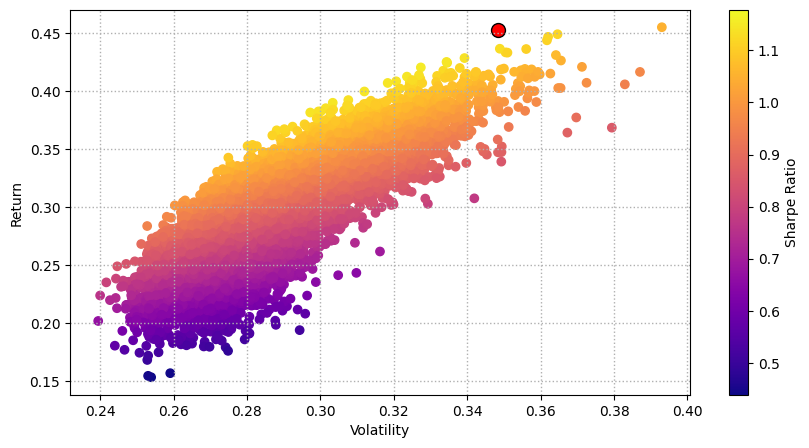

In [71]:
plt.figure(figsize = (10,5))
plt.scatter(vol_array,return_array, c = sharpe_array, cmap = 'plasma')
plt.colorbar(label = "Sharpe Ratio")
plt.xlabel("Volatility")
plt.ylabel("Return")

plt.scatter(sharpe_max_vol, sharpe_max_ret, c='red', s=100, edgecolors = 'black')
plt.grid(True, ls = ':', lw = 1)


In [77]:
df

# of Shares Starting Price Start Values Ending Prices Ending Values  \
Company                                                                        
ALNY             100       $ 115.68  $ 11,568.00      $ 253.07   $ 25,307.00   
BMRN             100        $ 84.00   $ 8,400.00       $ 66.03    $ 6,603.00   
DXCM             100        $ 54.67   $ 5,467.50       $ 77.99    $ 7,799.00   
EXAS             100        $ 94.94   $ 9,494.00       $ 62.08    $ 6,208.00   
EXEL             100        $ 17.01   $ 1,701.00       $ 36.46    $ 3,646.00   
IDXX             100       $ 264.77  $ 26,477.00      $ 421.75   $ 42,175.00   
ILMN             100       $ 313.94  $ 31,393.97      $ 144.15   $ 14,415.00   
INCY             100        $ 77.90   $ 7,790.00       $ 74.59    $ 7,459.00   
INSM             100        $ 23.75   $ 2,375.00       $ 75.16    $ 7,516.00   
MEDP             100        $ 82.53   $ 8,253.00      $ 340.63   $ 34,063.00   
MRNA             100        $ 18.89   $ 1,889.00       $ 43.06    $ 4,306.00   
NBIX             100       $ 109.78  $ 10,978.00      $ 126.75   $ 12,675.00   
NTRA             100        $ 32.86   $ 3,286.00      $ 167.78   $ 16,778.00   
REGN             100       $ 369.16  $ 36,916.00      $ 750.22   $ 75,022.00   
SMMT             100         $ 1.50     $ 149.80       $ 18.46    $ 1,846.00   
SRPT             100       $ 129.78  $ 12,978.00      $ 133.34   $ 13,334.00   
TECH             100        $ 53.08   $ 5,308.49       $ 75.36    $ 7,536.00   
UTHR             100        $ 86.46   $ 8,646.00      $ 370.49   $ 37,049.00   
VRTX             100       $ 217.98  $ 21,798.00      $ 468.13   $ 46,813.00   

        End Cumul. Returns Daily Volatility Annualized Volatility  
Company                                                            
ALNY               118.77%            3.15%                49.96%  
BMRN               -21.39%            2.40%                38.03%  
DXCM                42.64%            3.11%                49.41%  
EXAS               -34.61%            3.94%                62.57%  
EXEL               114.34%            2.53%                40.22%  
IDXX                59.29%            2.19%                34.82%  
ILMN               -54.08%            2.83%                44.96%  
INCY                -4.25%            1.97%                31.27%  
INSM               216.46%            5.00%                79.34%  
MEDP               312.73%            3.07%                48.77%  
MRNA               127.95%            4.73%                75.05%  
NBIX                15.46%            2.30%                36.53%  
NTRA               410.59%            4.20%                66.67%  
REGN               103.22%            1.94%                30.86%  
SMMT             1,132.31%           11.70%               185.76%  
SRPT                 2.74%            3.65%                57.95%  
TECH                41.96%            2.30%                36.58%  
UTHR               328.51%            2.08%                33.00%  
VRTX               114.76%            1.98%                31.44%

In [85]:
opt_weight

array([0.00579673, 0.03170162, 0.05384372, 0.01203398, 0.01309269,
       0.02508925, 0.00764291, 0.05175237, 0.00620209, 0.14351488,
       0.13675558, 0.00076237, 0.12415805, 0.06787736, 0.11016897,
       0.07030946, 0.03129315, 0.09365539, 0.01434944])

Company
ALNY    115.680000
BMRN     84.000000
DXCM     54.674999
EXAS     94.940002
EXEL     17.010000
IDXX    264.769989
ILMN    313.939697
INCY     77.900002
INSM     23.750000
MEDP     82.529999
MRNA     18.889999
NBIX    109.779999
NTRA     32.860001
REGN    369.160004
SMMT      1.498000
SRPT    129.779999
TECH     53.084866
UTHR     86.459999
VRTX    217.979996
Name: 2020-01-03, dtype: float64

In [93]:
#Investment Amount Allocation
investment_amount = 1_000_000
start_values = opt_weight * investment_amount

#Calculating Number of Shares
no_shares = start_values / s_prices.iloc[0]
no_shares = round(no_shares)

#Add Calculation to the DataFrame
df["# of Shares"] = no_shares
df["Start Values"] = s_prices.iloc[0] * no_shares
df["Ending Values"] = s_prices.iloc[-1] * no_shares
df

# of Shares Starting Price   Start Values Ending Prices  \
Company                                                            
ALNY            50.0       $ 115.68    5784.000015      $ 253.07   
BMRN           377.0        $ 84.00   31668.000000       $ 66.03   
DXCM           985.0        $ 54.67   53854.874249       $ 77.99   
EXAS           127.0        $ 94.94   12057.380310       $ 62.08   
EXEL           770.0        $ 17.01   13097.700176       $ 36.46   
IDXX            95.0       $ 264.77   25153.148956      $ 421.75   
ILMN            24.0       $ 313.94    7534.552734      $ 144.15   
INCY           664.0        $ 77.90   51725.601013       $ 74.59   
INSM           261.0        $ 23.75    6198.750000       $ 75.16   
MEDP          1739.0        $ 82.53  143519.667877      $ 340.63   
MRNA          7240.0        $ 18.89  136763.595581       $ 43.06   
NBIX             7.0       $ 109.78     768.459991      $ 126.75   
NTRA          3778.0        $ 32.86  124145.082306      $ 167.78   
REGN           184.0       $ 369.16   67925.440674      $ 750.22   
SMMT         73544.0         $ 1.50  110168.913894       $ 18.46   
SRPT           542.0       $ 129.78   70340.759338      $ 133.34   
TECH           589.0        $ 53.08   31266.985821       $ 75.36   
UTHR          1083.0        $ 86.46   93636.179008      $ 370.49   
VRTX            66.0       $ 217.98   14386.679718      $ 468.13   

         Ending Values End Cumul. Returns Daily Volatility  \
Company                                                      
ALNY      1.265350e+04            118.77%            3.15%   
BMRN      2.489331e+04            -21.39%            2.40%   
DXCM      7.682015e+04             42.64%            3.11%   
EXAS      7.884160e+03            -34.61%            3.94%   
EXEL      2.807420e+04            114.34%            2.53%   
IDXX      4.006625e+04             59.29%            2.19%   
ILMN      3.459600e+03            -54.08%            2.83%   
INCY      4.952776e+04             -4.25%            1.97%   
INSM      1.961676e+04            216.46%            5.00%   
MEDP      5.923556e+05            312.73%            3.07%   
MRNA      3.117544e+05            127.95%            4.73%   
NBIX      8.872500e+02             15.46%            2.30%   
NTRA      6.338728e+05            410.59%            4.20%   
REGN      1.380405e+05            103.22%            1.94%   
SMMT      1.357622e+06          1,132.31%           11.70%   
SRPT      7.227028e+04              2.74%            3.65%   
TECH      4.438704e+04             41.96%            2.30%   
UTHR      4.012407e+05            328.51%            2.08%   
VRTX      3.089658e+04            114.76%            1.98%   

        Annualized Volatility  
Company                        
ALNY                   49.96%  
BMRN                   38.03%  
DXCM                   49.41%  
EXAS                   62.57%  
EXEL                   40.22%  
IDXX                   34.82%  
ILMN                   44.96%  
INCY                   31.27%  
INSM                   79.34%  
MEDP                   48.77%  
MRNA                   75.05%  
NBIX                   36.53%  
NTRA                   66.67%  
REGN                   30.86%  
SMMT                  185.76%  
SRPT                   57.95%  
TECH                   36.58%  
UTHR                   33.00%  
VRTX                   31.44%

In [94]:
portfolio_returns  = d_return.dot(opt_weight)

In [96]:
plt.style.use('fivethirtyeight')

C:\Users\Chevy\AppData\Local\Temp\ipykernel_19688\2525747887.py:4: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



Text(0, 0.5, 'daily returns')

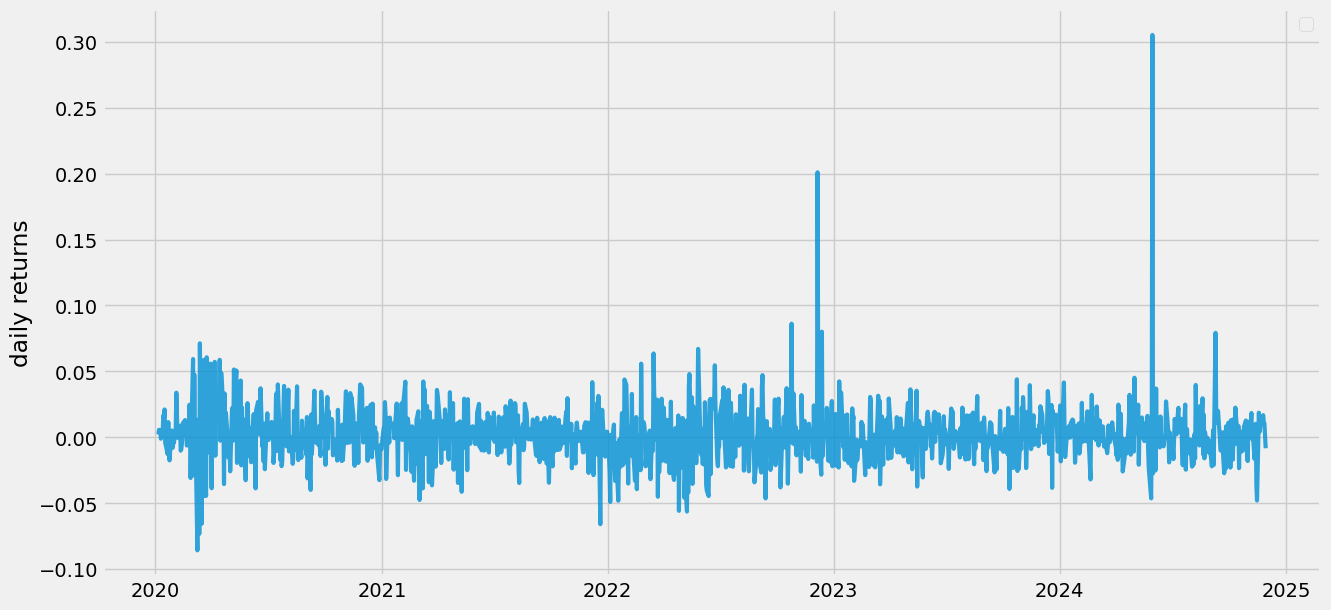

In [100]:
plt.figure(figsize=(14, 7))

plt.plot(portfolio_returns.index, portfolio_returns, lw=3, alpha=0.8)
plt.legend(loc='upper right', fontsize=12)
plt.ylabel('daily returns')

In [101]:
# Calculate cumulative returns
cumulative_returns = (1 + portfolio_returns).cumprod() - 1


In [104]:
cumulative_returns = cumulative_returns * 100

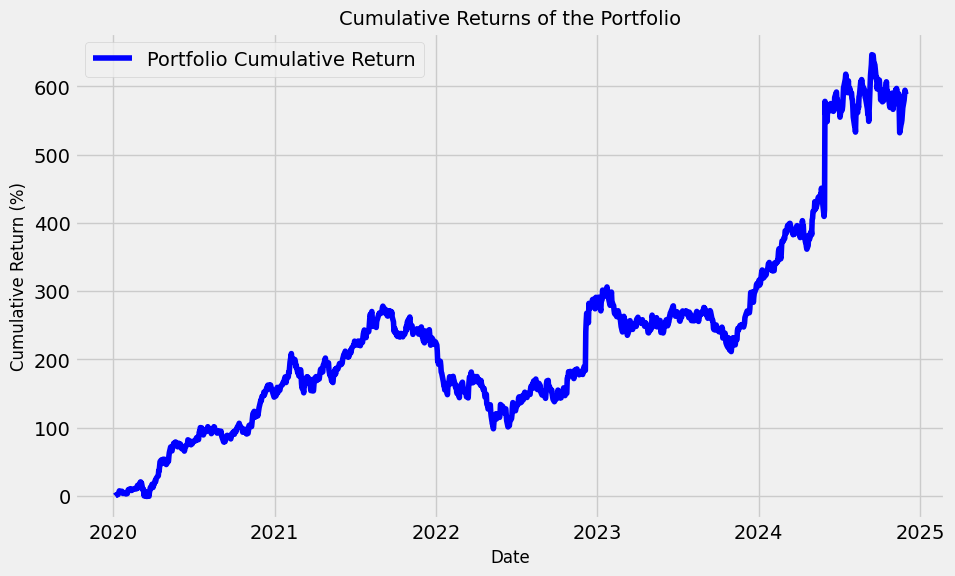

In [105]:
# Plot cumulative returns
plt.figure(figsize=(10, 6))
plt.plot(cumulative_returns, label="Portfolio Cumulative Return", color="blue")
plt.title("Cumulative Returns of the Portfolio", fontsize=14)

plt.xlabel("Date", fontsize=12)
plt.ylabel("Cumulative Return (%)", fontsize=12)
plt.grid(True)
plt.legend()
plt.show()

In [113]:
comp3353 = pd.DataFrame(cumulative_returns, columns=['Cumulative Return'])
comp3353

Cumulative Return
Date                         
2020-01-06           0.221696
2020-01-07           0.785091
2020-01-08           1.083696
2020-01-09           1.641977
2020-01-10           1.528415
...                       ...
2024-11-22         568.696481
2024-11-25         579.901603
2024-11-26         587.291508
2024-11-27         594.490202
2024-11-29         588.685787

[1235 rows x 1 columns]

Compare the portfolio performance with benchmarks (XBI and SPY)

In [121]:
biotech_etf = yf.download("XBI", start, end)
sp500 = yf.download("SPY", start, end)

# Use 'Adj Close' for adjusted prices
biotech_etf['Daily Return'] = biotech_etf['Adj Close'].pct_change()
sp500['Daily Return'] = sp500['Adj Close'].pct_change()

biotech_etf = biotech_etf.dropna()
sp500_etf = sp500.dropna()

# Calculate cumulative returns
biotech_etf['Cumulative Return'] = ((1 + biotech_etf['Daily Return']).cumprod() - 1) * 100
sp500['Cumulative Return'] = ((1 + sp500['Daily Return']).cumprod() - 1) * 100


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


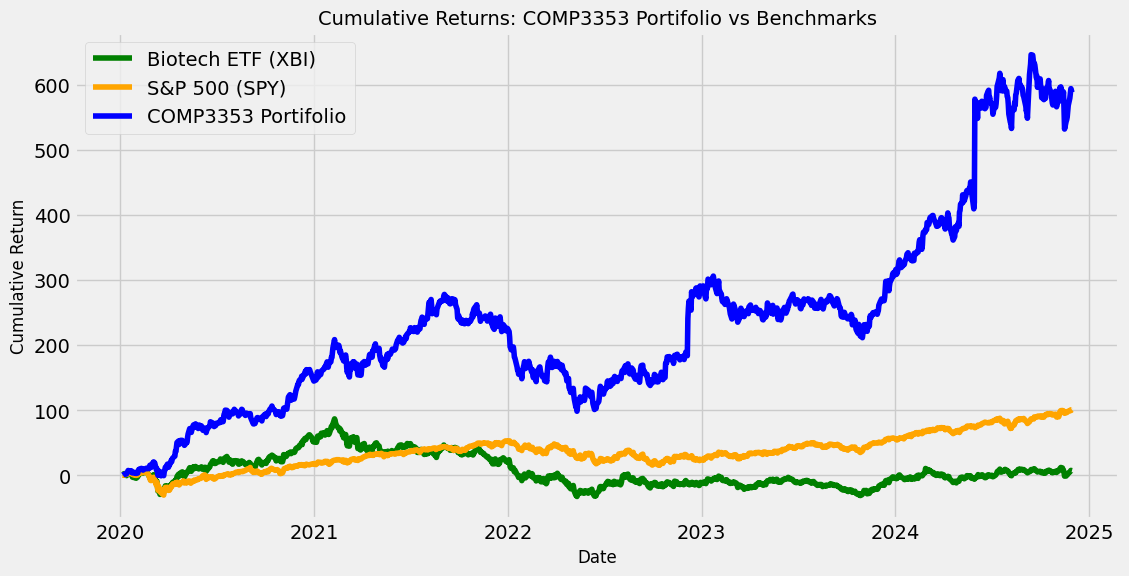

In [125]:
# Plot cumulative returns
plt.figure(figsize=(12, 6))
plt.plot(biotech_etf.index, biotech_etf['Cumulative Return'], label="Biotech ETF (XBI)", color='green')
plt.plot(sp500.index, sp500['Cumulative Return'], label="S&P 500 (SPY)", color='orange')
plt.plot(comp3353.index, comp3353['Cumulative Return'], label="COMP3353 Portifolio", color='blue')

# Add titles and labels
plt.title("Cumulative Returns: COMP3353 Portifolio vs Benchmarks", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Cumulative Return", fontsize=12)
plt.legend()
plt.grid(True)
plt.show()
